In [75]:
import pandas as pd
data=pd.read_csv('titan.csv',sep=';')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


# DATA PREPROCESSING:

In [76]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
data["Age"].value_counts()

24.0    30
22.0    27
18.0    26
28.0    25
19.0    25
        ..
36.5     1
55.5     1
34.5     1
14.5     1
23.5     1
Name: Age, Length: 88, dtype: int64

In [78]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [79]:
data["Cabin"].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64

In [80]:
data["Cabin"].fillna("G6",inplace=True)

In [81]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [82]:
data["Embarked"].fillna("S",inplace=True)

In [83]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [84]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S


<AxesSubplot:>

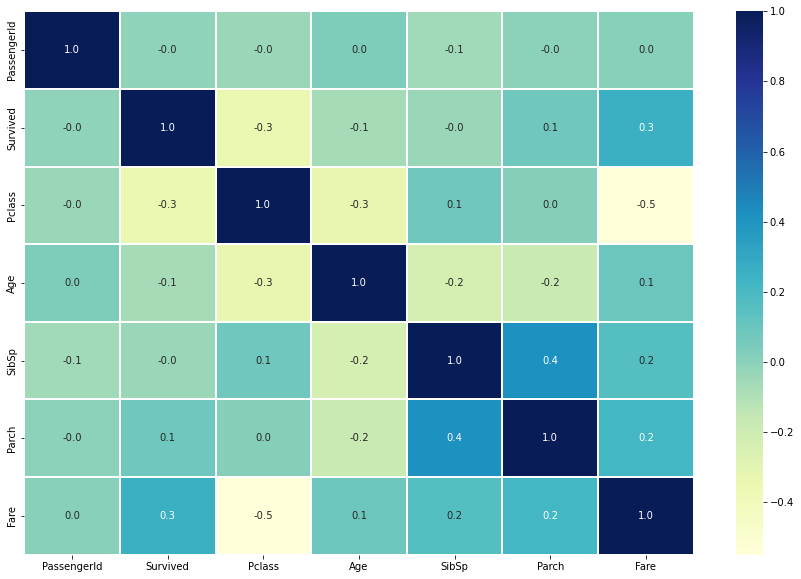

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
cleanup={"Survived":{"Yes":1, "No": 0}} 
data.replace(cleanup, inplace=True)
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu",linewidths=.1,fmt='.1f',ax=ax)

# LOGISTIC REGRESSION: 

In [90]:
data=data[data["Fare"]<70]

<AxesSubplot:>

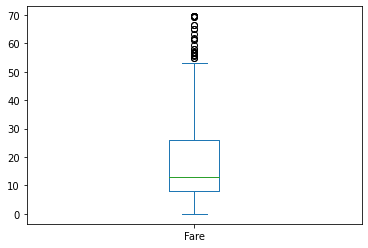

In [91]:
data["Fare"].plot(kind="box")

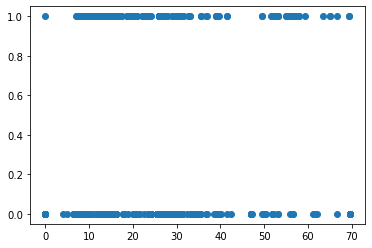

In [92]:
plt.scatter(data["Fare"],data["Survived"])

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x = data[['Fare']]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train) 
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.66


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

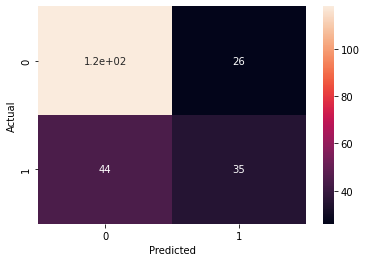

In [13]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       144
           1       0.57      0.44      0.50        79

    accuracy                           0.69       223
   macro avg       0.65      0.63      0.64       223
weighted avg       0.67      0.69      0.68       223



Sensitivity: The probability that the model predicts a positive outcome for an observation when indeed the outcome is positive. This is also called the “true positive rate.”

Specificity: The probability that the model predicts a negative outcome for an observation when indeed the outcome is negative. This is also called the “true negative rate.”

One way to visualize these two metrics is by creating a ROC curve, which stands for “receiver operating characteristic” curve. This is a plot that displays the sensitivity and specificity of a logistic regression model.

# ROC CURVE

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

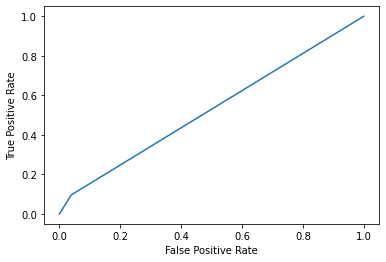

In [21]:
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC CURVE

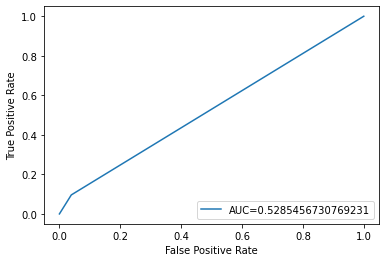

In [22]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

we can calculate the AUC – area under the curve – which tells us how much of the plot is located under the curve.